<a href="https://colab.research.google.com/github/Dominic098/AI-Brain-Tumor-Detector-Models/blob/main/code_for_images_AI_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from skimage import color # for converting to greyscale
import random # for shuffling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
base_dir = '/content/sample_data'
os.listdir(base_dir)


['README.md',
 'anscombe.json',
 'mnist_train_small.csv',
 'california_housing_test.csv',
 'mnist_test.csv',
 'california_housing_train.csv']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


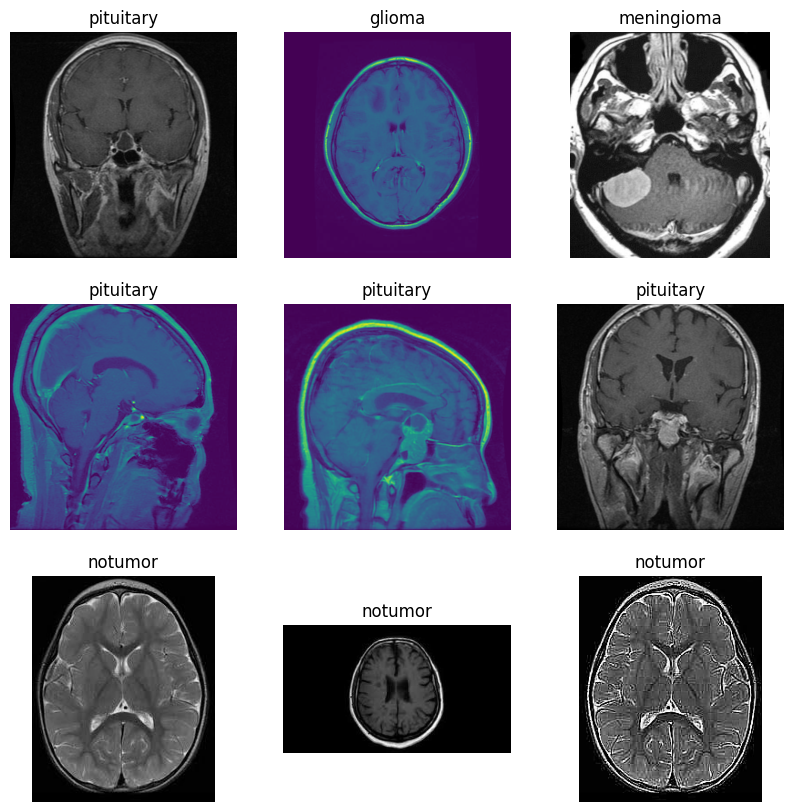

In [ ]:
classes = ['notumor', 'pituitary', 'meningioma', 'glioma'] #
all_images = []
for cls in classes:
  folder = os.path.join(base_dir,cls)
  for img_name in os.listdir(folder):  # collecting all image paths
        img_path = os.path.join(folder, img_name)
        all_images.append((img_path, cls))

random_images = random.sample(all_images, 9) # choosing nine random images
plt.figure(figsize=(10, 10))
for i, (img_path, label) in enumerate(random_images):
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.show()

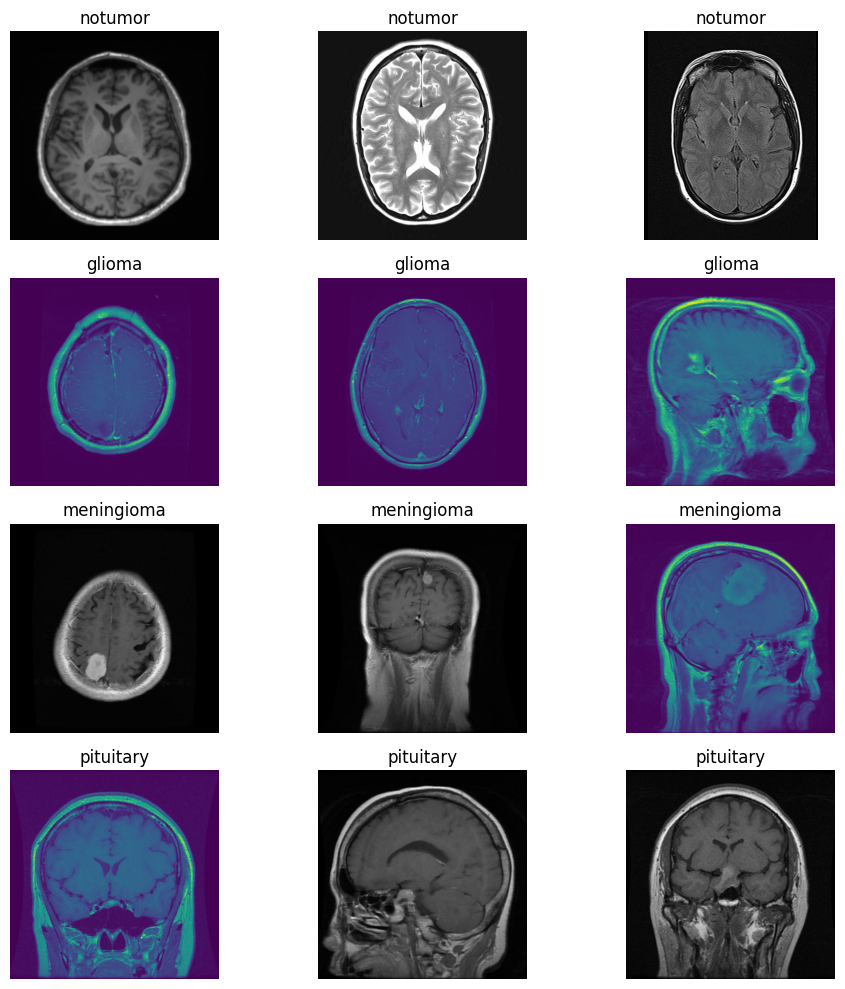

In [ ]:
classes = ['notumor', 'glioma', 'meningioma', 'pituitary']
plt.figure(figsize=(10, 10))

for i, cls in enumerate(classes):
    folder = os.path.join(base_dir, cls)
    class_images = [os.path.join(folder, img_name) for img_name in os.listdir(folder)]
    random_images = random.sample(class_images, 3) # choosing three random images per class

    for j, img_path in enumerate(random_images):
        img = mpimg.imread(img_path)
        plt.subplot(4, 3, i * 3 + j + 1) # Calculate subplot position
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

Randomly selected image: Tr-gl_0968.jpg


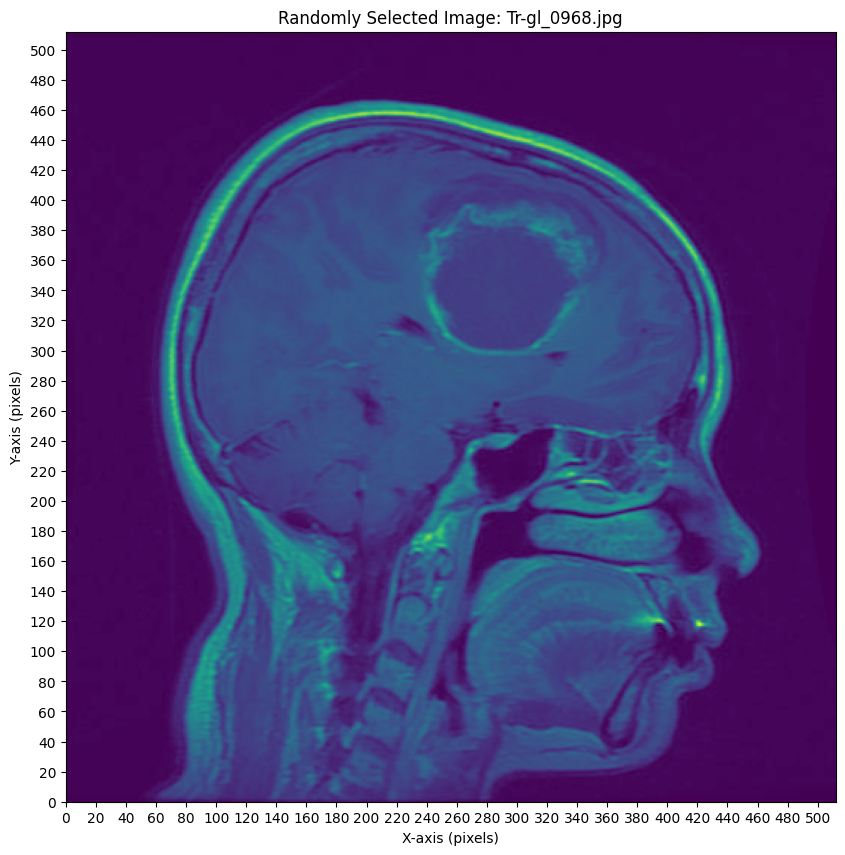

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np

target_dir = '/content/drive/MyDrive/Training/glioma'

if os.path.exists(target_dir) and os.path.isdir(target_dir):
    image_files = [f for f in os.listdir(target_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if image_files:
        random_image_name = random.choice(image_files)
        random_image_path = os.path.join(target_dir, random_image_name)
        print(f"Randomly selected image: {random_image_name}")

        try:
            img = mpimg.imread(random_image_path)
            plt.figure(figsize=(10, 10)) # fig size

            # Display the image with extent for proper axis alignment
            # Now setting extent to match the desired y-axis
            plt.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
            plt.title(f'Randomly Selected Image: {random_image_name}')

            # Set x and y axis limits to match image dimensions
            plt.xlim(0, img.shape[1])
            plt.ylim(0, img.shape[0]) # Invert y-axis to have (0,0) at bottom-left

            # Set x and y axis ticks to represent pixel values
            # Use a step of 20 pixels
            x_ticks = np.arange(0, img.shape[1], 20)
            y_ticks = np.arange(0, img.shape[0], 20)

            plt.xticks(x_ticks)
            plt.yticks(y_ticks)

            plt.xlabel('X-axis (pixels)')
            plt.ylabel('Y-axis (pixels)')
            plt.tick_params(axis='both', which='major', labelsize=10) # Ensure labels are visible

            plt.show()
        except Exception as e:
            print(f"Could not load or display image {random_image_path}: {e}")
    else:
        print(f"No image files found in '{target_dir}'.")
else:
    print(f"The directory '{target_dir}' does not exist or is not a directory.")

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,996 (425.77 KB)

 Trainable params: 108,996 (425.77 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 1115s 8s/step - accuracy: 0.2931 - loss: 1.3506 - val_accuracy: 0.4233 - val_loss: 1.2341
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 205ms/step - accuracy: 0.4125 - loss: 1.2322 - val_accuracy: 0.5460 - val_loss: 1.1572
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 206ms/step - accuracy: 0.4788 - loss: 1.1927 - val_accuracy: 0.5995 - val_loss: 1.1015
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 241ms/step - accuracy: 0.5051 - loss: 1.1295 - val_accuracy: 0.5995 - val_loss: 1.0861
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.5302 - loss: 1.0863 - val_accuracy: 0.6161 - val_loss: 1.0288
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 208ms/step - accuracy: 0.5318 - loss: 1.0598 - val_accuracy: 0.5504 - val_loss: 1.1140
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.5388 - loss: 1.0659 - val_accuracy: 0.6056 - val_loss: 1.0406
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 209ms/step - accuracy: 0.5518 - loss: 1.

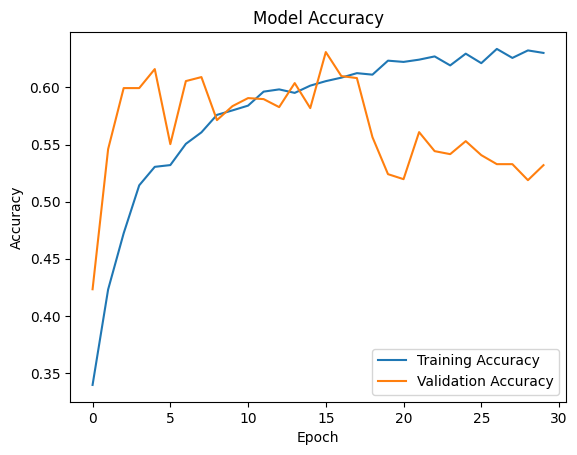

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set data_dir to the parent directory containing your class subdirectories
data_dir = '/content/drive/MyDrive/Training'

# 3. ImageDataGenerator that resizes everything to 28x28 and does basic augmentation
datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values to 0-1
    validation_split=0.2,    # 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# 4. Load and automatically resize to 28x28
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),      # THIS resizes 512×512 → 28×28
    color_mode='grayscale',    # use 'rgb' if your images are color
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',    # or 'rgb'
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 5. Your exact same model (works perfectly now!)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # 1 for grayscale, 3 for rgb
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()

# 6. Compile and train
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

# 7. Plot results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,996 (394.52 KB)

 Trainable params: 100,996 (394.52 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3448s 24s/step - accuracy: 0.3302 - loss: 1.3242 - val_accuracy: 0.4479 - val_loss: 1.2277
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.3930 - loss: 1.2390 - val_accuracy: 0.4706 - val_loss: 1.1966
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 234ms/step - accuracy: 0.4309 - loss: 1.2048 - val_accuracy: 0.5372 - val_loss: 1.1564
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 230ms/step - accuracy: 0.4712 - loss: 1.1564 - val_accuracy: 0.5618 - val_loss: 1.1437
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 233ms/step - accuracy: 0.4923 - loss: 1.1483 - val_accuracy: 0.5767 - val_loss: 1.1169
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 235ms/step - accuracy: 0.5202 - loss: 1.1069 - val_accuracy: 0.5898 - val_loss: 1.0913
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 230ms/step - accuracy: 0.5437 - loss: 1.0714 - val_accuracy: 0.5819 - val_loss: 1.0892
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 235ms/step - accuracy: 0.5310 - loss: 1

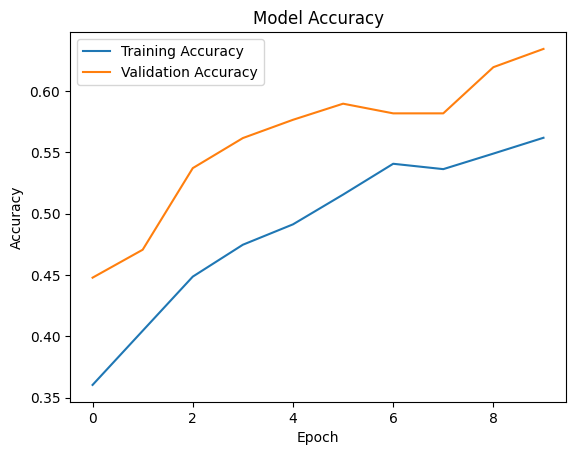

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set data_dir to the parent directory containing your class subdirectories
data_dir = '/content/drive/MyDrive/Training'

# 3. ImageDataGenerator that resizes everything to 28x28 and does basic augmentation
datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values to 0-1
    validation_split=0.2,    # 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# 4. Load and automatically resize to 28x28
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),      # THIS resizes 512×512 → 28×28
    color_mode='grayscale',    # use 'rgb' if your images are color
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',    # or 'rgb'
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 5. Your exact same model (works perfectly now!)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # 1 for grayscale, 3 for rgb
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # Removed the second Dense(64, activation='relu') layer as requested
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()

# 6. Compile and train
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# 7. Plot results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 239ms/step - accuracy: 0.3171 - loss: 1.3203 - val_accuracy: 0.4461 - val_loss: 1.1980
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 230ms/step - accuracy: 0.4533 - loss: 1.1811 - val_accuracy: 0.5355 - val_loss: 1.1720
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.5038 - loss: 1.1295 - val_accuracy: 0.5723 - val_loss: 1.1068
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.5581 - loss: 1.0636 - val_accuracy: 0.5574 - val_loss: 1.0999
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.5917 - loss: 1.0094 - val_accuracy: 0.6293 - val_loss: 1.0450
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 226ms/step - accuracy: 0.6048 - loss: 0.9614 - val_accuracy: 0.6380 - val_loss: 1.0299
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 237ms/step - accuracy: 0.6210 - loss: 0.9428 - val_accuracy: 0.6503 - val_loss: 0.9953
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 230ms/step - accuracy: 0.6172 - loss: 0

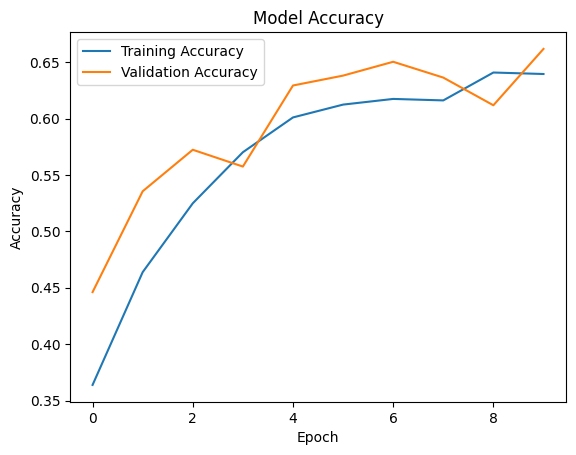

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set data_dir to the parent directory containing your class subdirectories
data_dir = '/content/drive/MyDrive/Training'

# 3. ImageDataGenerator that resizes everything to 28x28 and does basic augmentation
datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values to 0-1
    validation_split=0.2,    # 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# 4. Load and automatically resize to 28x28
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),      # THIS resizes 512×512 → 28×28
    color_mode='grayscale',    # use 'rgb' if your images are color
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',    # or 'rgb'
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 5. Your exact same model (works perfectly now!)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # flatten turns the 28x28 shape into one long array of pixels (784 pixels long)
  tf.keras.layers.Dense(30, activation='relu'), # hidden layer
  tf.keras.layers.Dense(20, activation='relu'), # hidden layer
  tf.keras.layers.Dense(10, activation='relu'), # hidden layer
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax') # output layer, adjusted to num_classes
])

model.summary()

# 6. Compile and train
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# 7. Plot results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1918s 13s/step - accuracy: 0.3326 - loss: 1.2955 - val_accuracy: 0.4750 - val_loss: 1.2080
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - accuracy: 0.4981 - loss: 1.1397 - val_accuracy: 0.5706 - val_loss: 1.1154
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 214ms/step - accuracy: 0.5635 - loss: 1.0433 - val_accuracy: 0.5995 - val_loss: 1.0580
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 218ms/step - accuracy: 0.5891 - loss: 0.9868 - val_accuracy: 0.5855 - val_loss: 1.0549
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step - accuracy: 0.6290 - loss: 0.9349 - val_accuracy: 0.6459 - val_loss: 0.9857
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 211ms/step - accuracy: 0.6300 - loss: 0.9036 - val_accuracy: 0.6503 - val_loss: 0.9802
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 213ms/step - accuracy: 0.6162 - loss: 0.9202 - val_accuracy: 0.6398 - val_loss: 0.9806
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 240ms/step - accuracy: 0.6473 - loss: 0

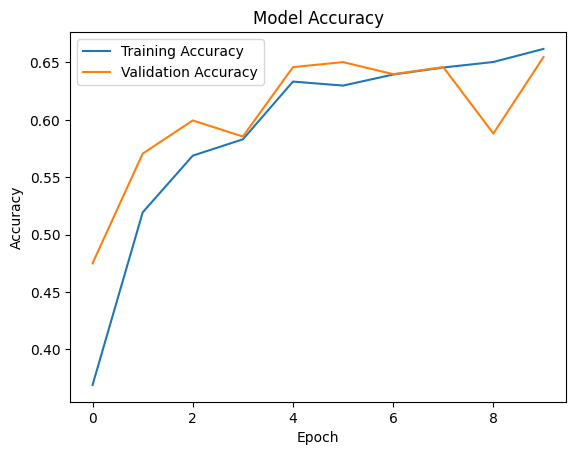

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set data_dir to the parent directory containing your class subdirectories
data_dir = '/content/drive/MyDrive/Training'

# 3. ImageDataGenerator that resizes everything to 28x28 and does basic augmentation
datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values to 0-1
    validation_split=0.2,    # 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# 4. Load and automatically resize to 28x28
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),      # THIS resizes 512×512 → 28×28
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 5. Your exact same model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # flatten turns the 28x28 shape into one long array of pixels (784 pixels long)
  tf.keras.layers.Dense(64, activation='relu'), # hidden layer
  tf.keras.layers.Dense(32, activation='relu'), # hidden layer
  tf.keras.layers.Dense(16, activation='relu'), # hidden layer
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax') # output layer, adjusted to num_classes
])

model.summary()

# 6. Compile and train
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# 7. Plot results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 768)            │       787,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 768)            │         3,072 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 384)            │       196,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 384)            │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,334,276 (8.90 MB)

 Trainable params: 2,328,004 (8.88 MB)

 Non-trainable params: 6,272 (24.50 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2824s 20s/step - accuracy: 0.3518 - loss: 1.6348 - val_accuracy: 0.3988 - val_loss: 1.2769 - learning_rate: 5.0000e-04
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 45s 311ms/step - accuracy: 0.4948 - loss: 1.2242 - val_accuracy: 0.5469 - val_loss: 1.2106 - learning_rate: 5.0000e-04
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 47s 332ms/step - accuracy: 0.5297 - loss: 1.1244 - val_accuracy: 0.5968 - val_loss: 1.0790 - learning_rate: 5.0000e-04
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 46s 319ms/step - accuracy: 0.5518 - loss: 1.0765 - val_accuracy: 0.6047 - val_loss: 1.0799 - learning_rate: 5.0000e-04
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 49s 341ms/step - accuracy: 0.5528 - loss: 1.0971 - val_accuracy: 0.6188 - val_loss: 1.0918 - learning_rate: 5.0000e-04
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 360ms/step - accuracy: 0.5671 - loss: 1.0428 - val_accuracy: 0.6170 - val_loss: 1.0355 - learning_rate: 5.0000e-04
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 46s 32

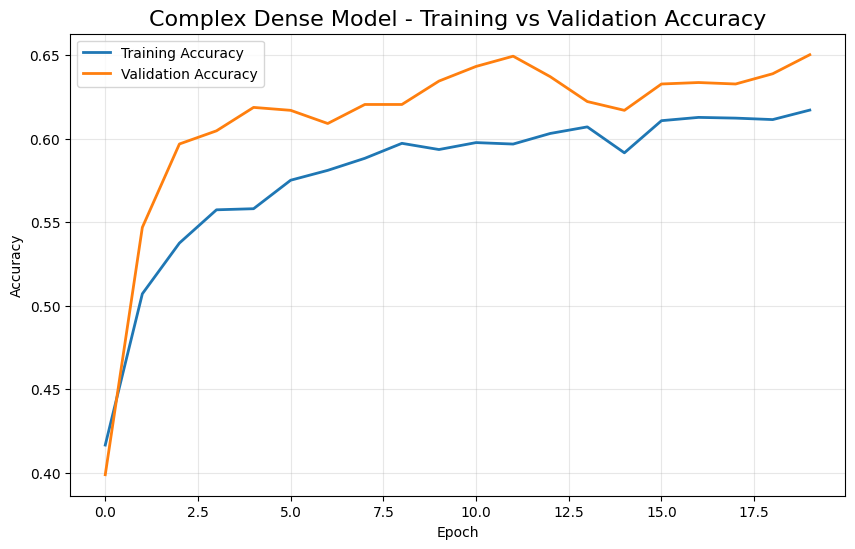

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Set data_dir to the parent directory containing your class subdirectories
data_dir = '/content/drive/MyDrive/Training'

# ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# COMPLEX DENSE-ONLY MODEL
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),

    # Wide and deep blocks with BatchNorm + Dropout for stable training
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(768, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(384, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    # Output layer
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Show the parameter count
model.summary()

# Compile with a slightly lower learning rate for stability with such a big net
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_generator,
    epochs=20,                    # Increased because the model can keep learning
    validation_data=val_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=4)
    ]
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Complex Dense Model - Training vs Validation Accuracy', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,476 (1.36 MB)

 Trainable params: 356,004 (1.36 MB)

 Non-trainable params: 1,472 (5.75 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1171s 8s/step - accuracy: 0.4817 - loss: 1.3095 - val_accuracy: 0.2848 - val_loss: 1.5338 - learning_rate: 0.0010
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 48s 334ms/step - accuracy: 0.5780 - loss: 1.0252 - val_accuracy: 0.2550 - val_loss: 3.3511 - learning_rate: 0.0010
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 45s 311ms/step - accuracy: 0.6756 - loss: 0.8015 - val_accuracy: 0.2550 - val_loss: 5.6901 - learning_rate: 0.0010
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 286ms/step - accuracy: 0.7074 - loss: 0.7440 - val_accuracy: 0.4032 - val_loss: 2.9504 - learning_rate: 0.0010
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 47s 326ms/step - accuracy: 0.7431 - loss: 0.6606 - val_accuracy: 0.5215 - val_loss: 1.4510 - learning_rate: 0.0010
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 51s 354ms/step - accuracy: 0.7560 - loss: 0.6529 - val_accuracy: 0.6337 - val_loss: 1.0470 - learning_rate: 0.0010
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 46s 319ms/step - accuracy: 0.78

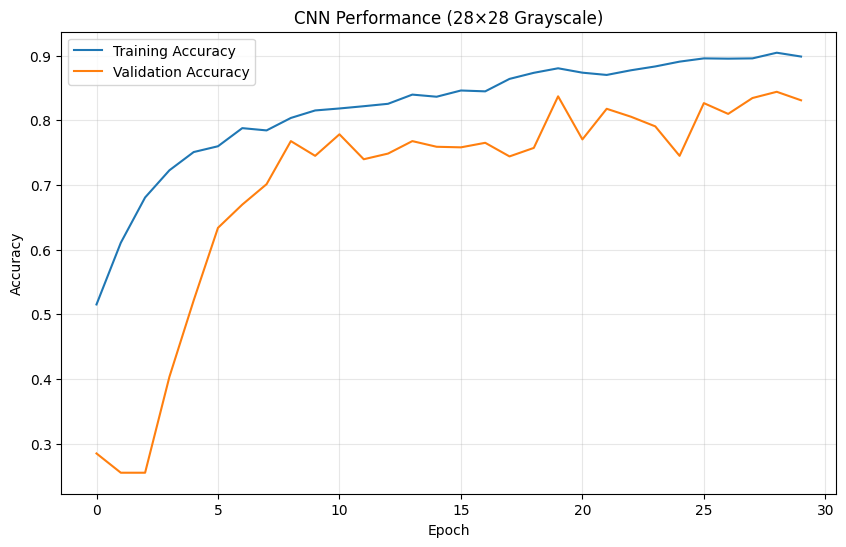

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


data_dir = '/content/drive/MyDrive/Training'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


# Upgrade


model = tf.keras.models.Sequential([
    # Input is automatically (28, 28, 1) because of grayscale
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # === Convolutional feature extractor ===
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.GlobalAveragePooling2D(),   # huge Dense

    # Tiny classifier on top
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()




model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
    ]
)

# Plot
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Performance (28×28 Grayscale)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Classes found: ['glioma', 'meningioma', 'notumor', 'pituitary']
Training samples: 4571
Validation samples: 1141


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 7, 7, 128)      │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 7, 7, 128)      │             

 Total params: 718,884 (2.74 MB)

 Trainable params: 716,452 (2.73 MB)

 Non-trainable params: 2,432 (9.50 KB)

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 70s 451ms/step - accuracy: 0.4125 - loss: 1.3755 - val_accuracy: 0.2550 - val_loss: 1.5075
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 64s 444ms/step - accuracy: 0.4845 - loss: 1.2428 - val_accuracy: 0.2550 - val_loss: 1.8127
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 62s 433ms/step - accuracy: 0.5210 - loss: 1.1786 - val_accuracy: 0.3295 - val_loss: 1.5066
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 61s 423ms/step - accuracy: 0.5561 - loss: 1.1200 - val_accuracy: 0.4128 - val_loss: 1.3537
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 64s 448ms/step - accuracy: 0.5817 - loss: 1.0903 - val_accuracy: 0.5206 - val_loss: 1.1388
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 478ms/step - accuracy: 0.5962 - loss: 1.0731 - val_accuracy: 0.5846 - val_loss: 1.1100
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 64s 450ms/step - accuracy: 0.6204 - loss: 1.0149 - val_accuracy: 0.5995 - val_loss: 1.0710
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 62s 434ms/step - accuracy: 0.6284 - loss: 0

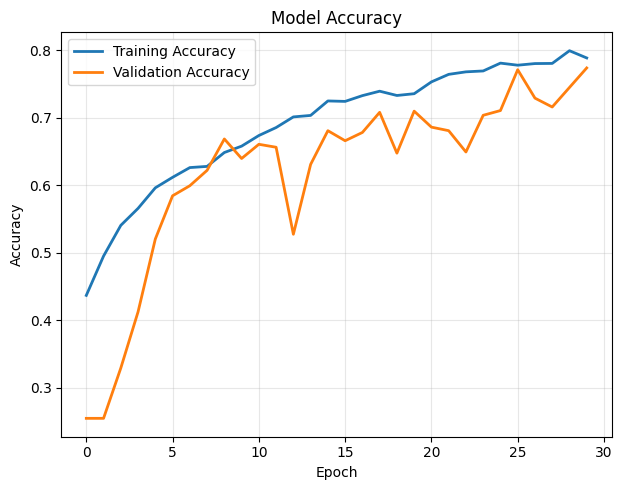

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


data_dir = '/content/drive/MyDrive/Training'


datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

# -------------------------------
#  Create generators
# -------------------------------
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"Classes found: {list(train_generator.class_indices.keys())}")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # Block 1
    tf.keras.layers.Conv2D(32, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    # Block 2
    tf.keras.layers.Conv2D(64, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    # Block 3 (deeper & wider)
    tf.keras.layers.Conv2D(128, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.GlobalAveragePooling2D(),

    # Classifier head
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()


# Compile

model.compile(
    optimizer=tf.keras.optimizers.AdamW(
        learning_rate=0.001,
        weight_decay=0.0005
    ),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)


# TRAIN

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    verbose=1
)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Classes found: ['glioma', 'meningioma', 'notumor', 'pituitary']
Training samples: 4571
Validation samples: 1141


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 7, 7, 128)      │             

 Total params: 718,884 (2.74 MB)

 Trainable params: 716,452 (2.73 MB)

 Non-trainable params: 2,432 (9.50 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1084s 8s/step - accuracy: 0.4074 - loss: 1.3638 - val_accuracy: 0.3681 - val_loss: 1.5978
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 352ms/step - accuracy: 0.4685 - loss: 1.2554 - val_accuracy: 0.2585 - val_loss: 1.6079
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 49s 341ms/step - accuracy: 0.5340 - loss: 1.1513 - val_accuracy: 0.4075 - val_loss: 1.3282
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 49s 342ms/step - accuracy: 0.5460 - loss: 1.1134 - val_accuracy: 0.3996 - val_loss: 1.3427
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 49s 344ms/step - accuracy: 0.5763 - loss: 1.0843 - val_accuracy: 0.4847 - val_loss: 1.2675
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 351ms/step - accuracy: 0.6014 - loss: 1.0476 - val_accuracy: 0.6354 - val_loss: 1.0427
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 346ms/step - accuracy: 0.6089 - loss: 1.0339 - val_accuracy: 0.5557 - val_loss: 1.1491
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 51s 359ms/step - accuracy: 0.6325 - loss: 0.

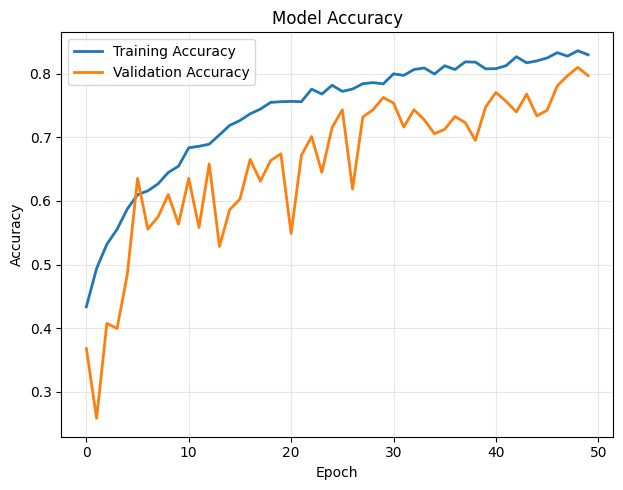

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


data_dir = '/content/drive/MyDrive/Training'


datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

# -------------------------------
#  Create generators
# -------------------------------
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"Classes found: {list(train_generator.class_indices.keys())}")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # Block 1
    tf.keras.layers.Conv2D(32, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    # Block 2
    tf.keras.layers.Conv2D(64, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    # Block 3 (deeper & wider)
    tf.keras.layers.Conv2D(128, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.GlobalAveragePooling2D(),

    # Classifier head
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('gelu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()


# Compile

model.compile(
    optimizer=tf.keras.optimizers.AdamW(
        learning_rate=0.001,
        weight_decay=0.0005
    ),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)


# TRAIN

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    verbose=1
)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Mixed precision = 20–40% faster training on T4/A100
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Enable XLA (JIT) = ~10% faster
tf.config.optimizer.set_jit(True)


# ================================
# Dataset
# ================================
data_dir = "/content/drive/MyDrive/Training"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


# ================================
# EfficientNet CNN
# ================================
base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

# Phase 1: freeze base
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation="softmax", dtype="float32")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


# ================================
# Phase 1 Training
# ================================
history1 = model.fit(
    train_gen,
    epochs=8,
    validation_data=val_gen,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
    ]
)


# ================================
# Phase 2 Fine-Tuning
# ================================
base_model.trainable = True

# Only fine-tune the top EfficientNet layers
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3),
        tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
    ]
)


# ================================
# Plot accuracy
# ================================
plt.figure(figsize=(10,5))
plt.plot(history1.history["accuracy"] + history2.history["accuracy"], label="Train Acc")
plt.plot(history1.history["val_accuracy"] + history2.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.grid(True)
plt.show()


/bin/bash: line 1: nvidia-smi: command not found
Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/8
143/143 ━━━━━━━━━━━━━━━━━━━━ 1300s 9s/step - accuracy: 0.2574 - loss: 1.4325 - val_accuracy: 0.2550 - val_loss: 1.3876
Epoch 2/8
143/143 ━━━━━━━━━━━━━━━━━━━━ 1277s 9s/step - accuracy: 0.2654 - loss: 1.3900 - val_accuracy: 0.2796 - val_loss: 1.3825
Epoch 3/8
  2/143 ━━━━━━━━━━━━━━━━━━━━ 17:13 7s/step - accuracy: 0.2734 - loss: 1.3943

KeyboardInterrupt: 

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import layers, models, optimizers, callbacks
import matplotlib.pyplot as plt

# Speed maximizers
tf.keras.mixed_precision.set_global_policy('mixed_float16')
tf.config.optimizer.set_jit(True)


IMG_SIZE = 128          # ← 128×128 instead of 224
BATCH_SIZE = 64         # ← double batch size (fits in memory)

data_dir = "/content/drive/MyDrive/Training"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=15.0,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


base_model = MobileNetV3Large(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    alpha=1.0,           # 1.0 = full size, still fast
    minimalistic=False
)

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(train_gen.num_classes, activation='softmax', dtype='float32')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

model.summary()


history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen,
    callbacks=[
        callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor='val_accuracy'),
        callbacks.ReduceLROnPlateau(factor=0.4, patience=4, min_lr=1e-7),
        callbacks.ModelCheckpoint('fast_brain_tumor_best.keras', save_best_only=True, monitor='val_accuracy')
    ]
)


plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.grid(True); plt.show()

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 4, 4, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 960)            │         3,840 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       246,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,247,236 (12.39 MB)

 Trainable params: 248,964 (972.52 KB)

 Non-trainable params: 2,998,272 (11.44 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 1029s 14s/step - accuracy: 0.4517 - loss: 1.2832 - val_accuracy: 0.3988 - val_loss: 1.3787 - learning_rate: 0.0010
Epoch 2/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.5861 - loss: 1.0847 - val_accuracy: 0.4084 - val_loss: 1.3341 - learning_rate: 0.0010
Epoch 3/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.5748 - loss: 1.0683 - val_accuracy: 0.4575 - val_loss: 1.2852 - learning_rate: 0.0010
Epoch 4/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.6071 - loss: 1.0494 - val_accuracy: 0.4926 - val_loss: 1.2682 - learning_rate: 0.0010
Epoch 5/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.5979 - loss: 1.0397 - val_accuracy: 0.5609 - val_loss: 1.2070 - learning_rate: 0.0010
Epoch 6/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.6122 - loss: 1.0255 - val_accuracy: 0.5837 - val_loss: 1.1836 - learning_rate: 0.0010
Epoch 7/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.6142 - loss: 1.0213 - val_a

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,476 (1.36 MB)

 Trainable params: 356,004 (1.36 MB)

 Non-trainable params: 1,472 (5.75 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 200s 11s/step - accuracy: 0.3898 - loss: 1.5445 - val_accuracy: 0.2550 - val_loss: 1.3907 - learning_rate: 0.0010
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 189s 10s/step - accuracy: 0.5050 - loss: 1.1024 - val_accuracy: 0.2340 - val_loss: 1.4429 - learning_rate: 0.0010
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 187s 10s/step - accuracy: 0.5578 - loss: 0.9889 - val_accuracy: 0.2287 - val_loss: 1.5672 - learning_rate: 0.0010
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.5925 - loss: 0.9458 - val_accuracy: 0.2550 - val_loss: 1.6897 - learning_rate: 0.0010
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 183s 10s/step - accuracy: 0.6284 - loss: 0.8531 - val_accuracy: 0.2550 - val_loss: 1.7179 - learning_rate: 0.0010
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 179s 10s/step - accuracy: 0.6567 - loss: 0.8082 - val_accuracy: 0.2550 - val_loss: 1.8996 - learning_rate: 5.0000e-04
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.6718 - loss: 0.778

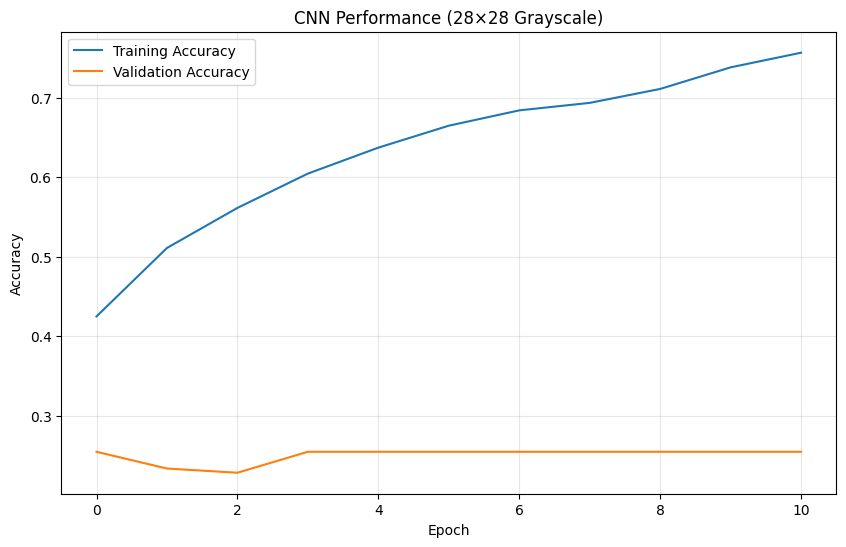

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_dir = '/content/drive/MyDrive/Training'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.7, 1.3]
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=256,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=256,
    class_mode='categorical',
    subset='validation'
)


# Upgrade


model = tf.keras.models.Sequential([
    # Input is automatically (28, 28, 1) because of grayscale
    tf.keras.layers.Input(shape=(64, 64, 1)),

    # === Convolutional feature extractor ===
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.GlobalAveragePooling2D(),   # huge Dense

    # Tiny classifier on top
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()




model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=4)
    ]
)

# Plot
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Performance (28×28 Grayscale)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,476 (1.36 MB)

 Trainable params: 356,004 (1.36 MB)

 Non-trainable params: 1,472 (5.75 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 51s 327ms/step - accuracy: 0.5011 - loss: 1.2940 - val_accuracy: 0.2323 - val_loss: 2.2490 - learning_rate: 0.0010
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 46s 318ms/step - accuracy: 0.6174 - loss: 0.9720 - val_accuracy: 0.2550 - val_loss: 5.1525 - learning_rate: 0.0010
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 46s 324ms/step - accuracy: 0.6976 - loss: 0.8150 - val_accuracy: 0.4321 - val_loss: 2.4346 - learning_rate: 0.0010
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 46s 322ms/step - accuracy: 0.7102 - loss: 0.7570 - val_accuracy: 0.2594 - val_loss: 5.7658 - learning_rate: 0.0010
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 48s 334ms/step - accuracy: 0.7515 - loss: 0.6565 - val_accuracy: 0.4926 - val_loss: 1.8168 - learning_rate: 0.0010
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 45s 315ms/step - accuracy: 0.7695 - loss: 0.6189 - val_accuracy: 0.5960 - val_loss: 1.4293 - learning_rate: 0.0010
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 45s 316ms/step - accuracy: 0.7

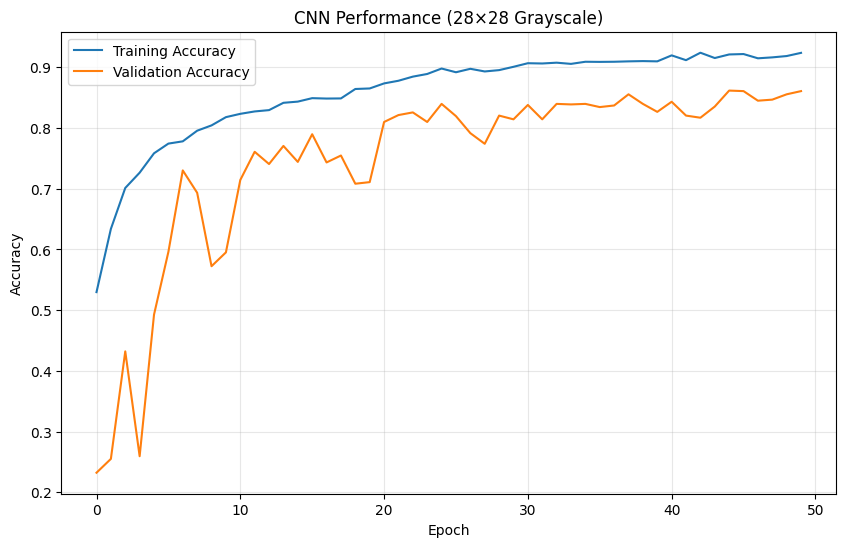

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_dir = '/content/drive/MyDrive/Training'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


# Upgrade


model = tf.keras.models.Sequential([
    # Input is automatically (28, 28, 1) because of grayscale
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # === Convolutional feature extractor ===
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.GlobalAveragePooling2D(),   # huge Dense

    # Tiny classifier on top
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()




model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
    ]
)

# Plot
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Performance (28×28 Grayscale)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import os
os.kill(os.getpid(), 9)